# <p style="background-color:purple; font-family:newtimeroman; font-size:180%; text-align:center; border-radius: 15px 50px;"> Pathfinding Algorithm Analysis 📚</p>

## Importing Libraries


In [263]:
import numpy as np, pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt, seaborn as sns,klib

%matplotlib inline

%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style='whitegrid', color_codes=True, font_scale=1.5,
        palette='RdYlGn', font='Arial', rc={'figure.figsize': (10,8)})

## Reading data

In [264]:
df = pd.read_csv('./algoCompare.csv')
df.head()

,Algorithm,TimeTaken,Nodes,Time/Node
0,astar,0.01,1976,0.00
1,dijkstra,0.01,1523,0.00
2,astar,0.00,357,0.00
3,dijkstra,0.02,4876,0.00
4,dijkstra,0.01,2355,0.00


In [265]:
df.shape

(1156, 4)

## Renaming data


In [266]:
df.columns

Index(['Algorithm', 'TimeTaken', 'Nodes', 'Time/Node'], dtype='object')

In [267]:
# Rename TimeTaken to TimeTaken (s)
df.rename(columns={'TimeTaken': 'TimeTaken (s)'}, inplace=True)

In [268]:
df = df[df['Time/Node'] < 0.00025] # remove outliers

# convert Time/Node to 10-6 seconds (microseconds)
df['Time/Node(10-6s)'] = df['Time/Node'].apply(lambda x: x * 1e6)

df.drop(columns=['Time/Node'], inplace=True)

df.head()


,Algorithm,TimeTaken (s),Nodes,Time/Node(10-6s)
0,astar,0.01,1976,4.95
1,dijkstra,0.01,1523,5.11
2,astar,0.00,357,6.97
3,dijkstra,0.02,4876,4.23
4,dijkstra,0.01,2355,4.97


## Algorithm analysis

In [269]:
df.groupby('Algorithm').mean()

,TimeTaken (s),Nodes,Time/Node(10-6s)
Algorithm,,,
astar,0.00,477.97,11.06
dijkstra,0.03,2842.83,15.21


In [270]:
# count of dijsktra's algorithm, A* algorithm, 
dijsktra_count = df[df['Algorithm'] == 'dijkstra'].shape[0]
a_star_count = df[df['Algorithm'] == 'astar'].shape[0]

print(f"dijkstra: {dijsktra_count} | astar: {a_star_count}")

dijkstra: 1038 | astar: 96


<AxesSubplot:xlabel='Algorithm', ylabel='count'>

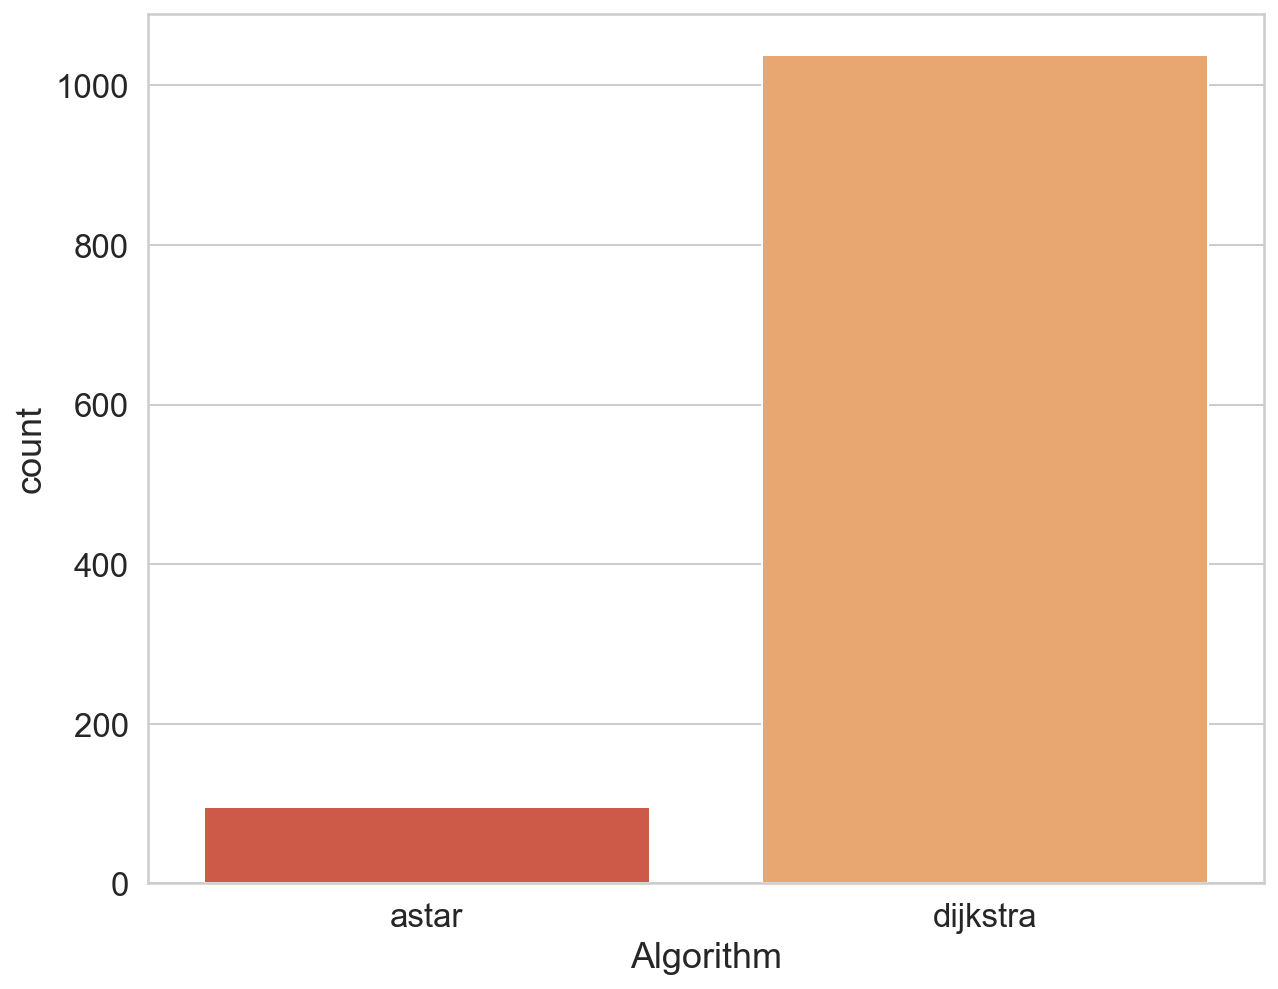

In [271]:
# plot frequency of algorithms
sns.countplot(x='Algorithm', data=df)

Highly imbalanced data with astar having a count of 96 and dijkstra having a count of 1038.


## Random under-sampling

In [272]:
df.value_counts('Algorithm')

Algorithm
dijkstra    1038
astar         96
dtype: int64

In [273]:
# Using random undersampling to balance the data
df_dijsktra = df[df['Algorithm'] == 'dijkstra']
df_astar = df[df['Algorithm'] == 'astar']

In [274]:
df_dijsktra_under = df_dijsktra.sample(a_star_count)

# delete df
df = None
df = pd.concat([df_dijsktra_under, df_astar]) # concatenate the dataframes
df

,Algorithm,TimeTaken (s),Nodes,Time/Node(10-6s)
760,dijkstra,0.02,775,25.26
825,dijkstra,0.02,989,21.24
1141,dijkstra,0.04,2636,16.64
35,dijkstra,0.04,5899,7.14
66,dijkstra,0.08,5960,12.96
...,...,...,...,...
1054,astar,0.01,912,14.55
1061,astar,0.04,1179,29.94
1150,astar,0.00,507,6.48
1153,astar,0.00,507,6.83


<AxesSubplot:xlabel='Algorithm', ylabel='count'>

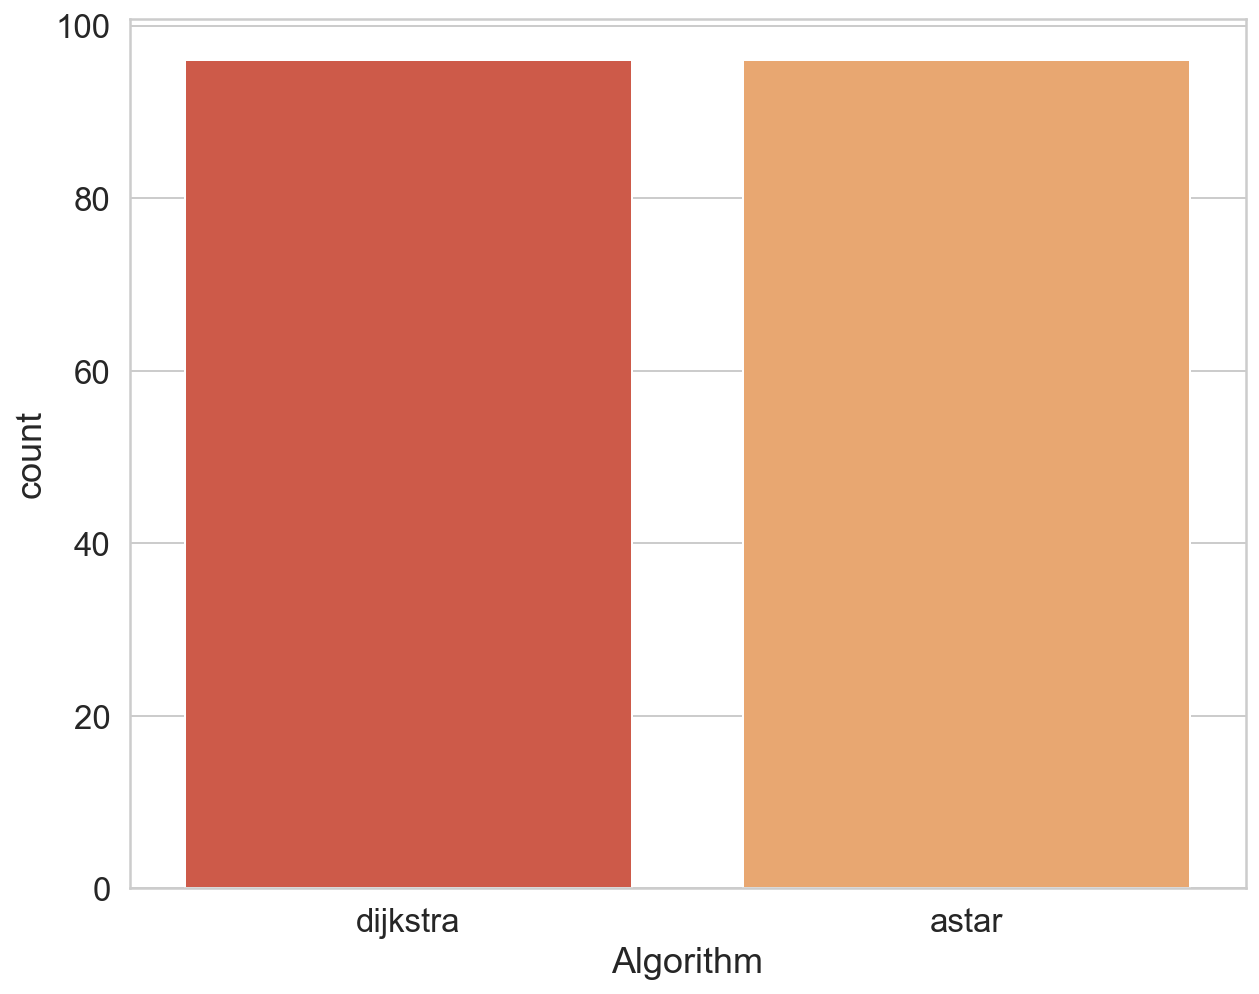

In [275]:
sns.countplot(x='Algorithm', data=df)

Based on the above analysis, we used random under-sampling to balance the data.

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 760 to 1155
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Algorithm         192 non-null    object 
 1   TimeTaken (s)     192 non-null    float64
 2   Nodes             192 non-null    int64  
 3   Time/Node(10-6s)  192 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 11.6+ KB


In [277]:
df.dtypes

Algorithm            object
TimeTaken (s)       float64
Nodes                 int64
Time/Node(10-6s)    float64
dtype: object

In [278]:
df.columns

Index(['Algorithm', 'TimeTaken (s)', 'Nodes', 'Time/Node(10-6s)'], dtype='object')

In [279]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TimeTaken (s),192.00,0.02,0.03,0.00,0.00,0.01,0.03,0.12
Nodes,192.00,1748.97,1977.08,33.00,367.25,760.00,2664.00,6243.00
Time/Node(10-6s),192.00,13.39,10.36,4.51,7.23,9.34,16.35,90.41


In [280]:
df.isnull().sum()

Algorithm           0
TimeTaken (s)       0
Nodes               0
Time/Node(10-6s)    0
dtype: int64

No missing values

In [281]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

## Standard EDA


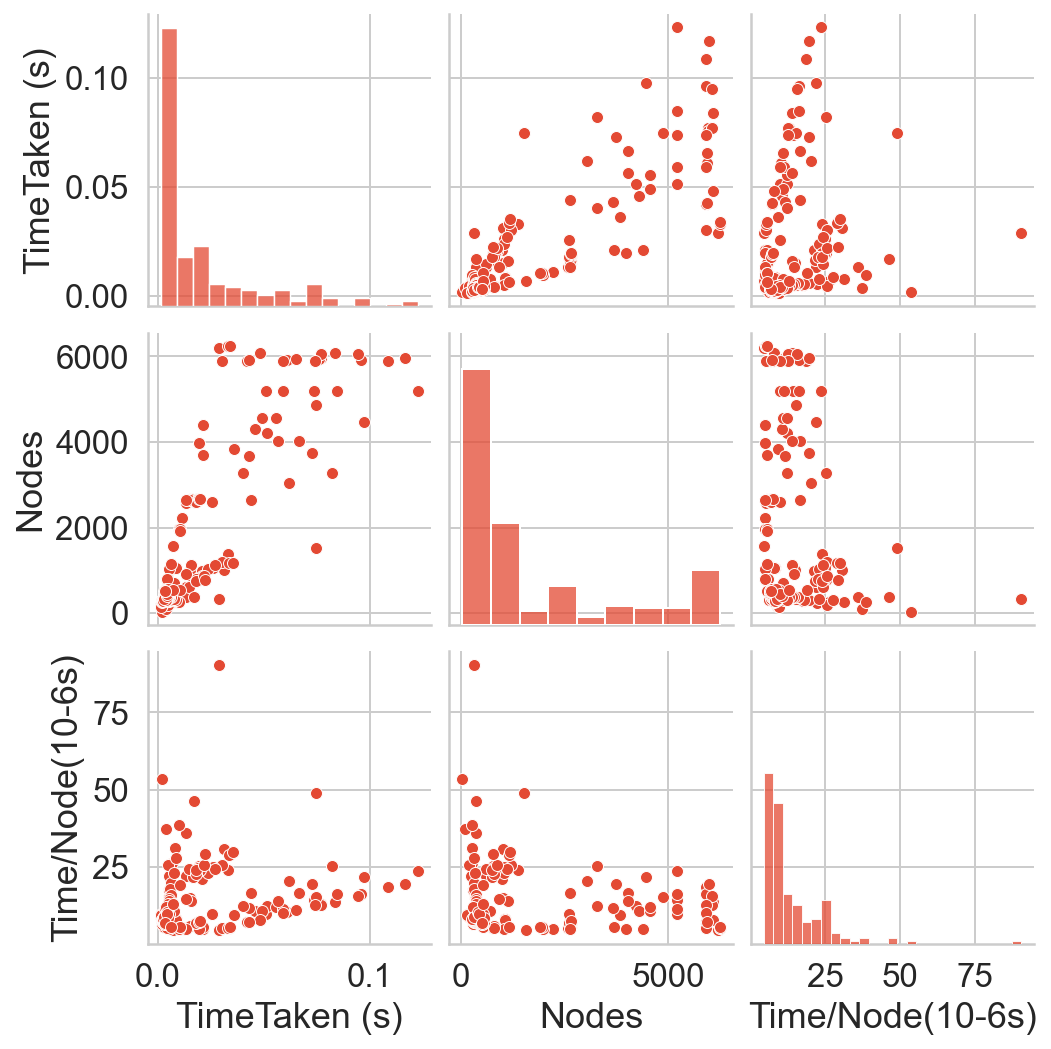

In [294]:
sns.pairplot(df)

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

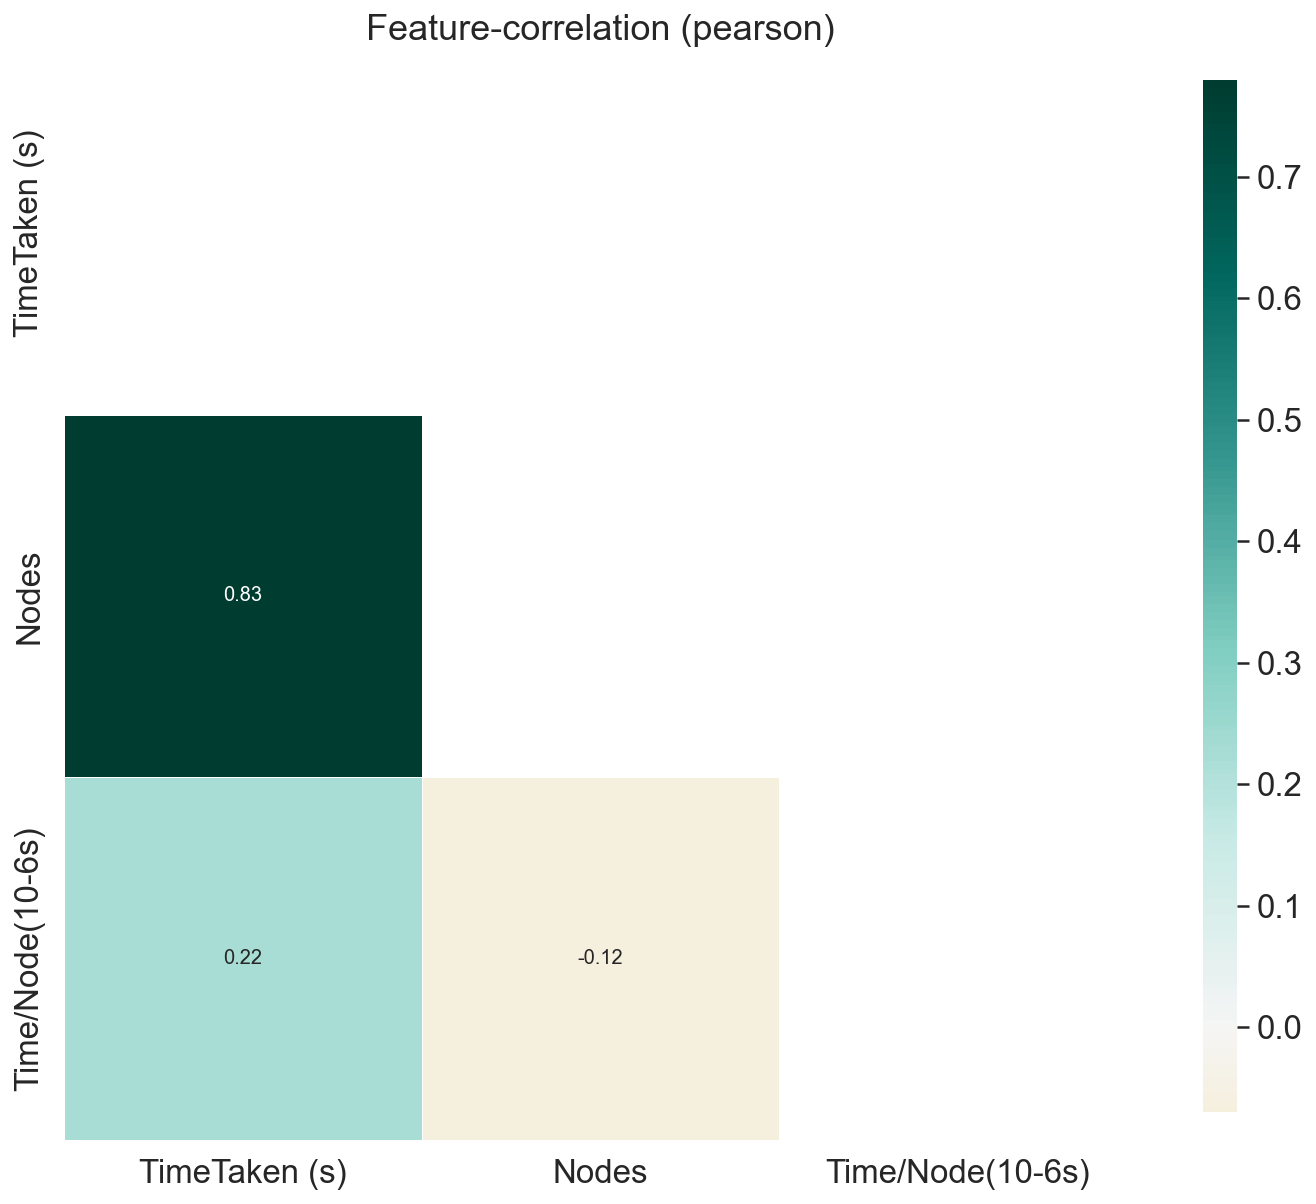

In [282]:
klib.corr_plot(df)

<AxesSubplot:xlabel='TimeTaken (s)', ylabel='Time/Node(10-6s)'>

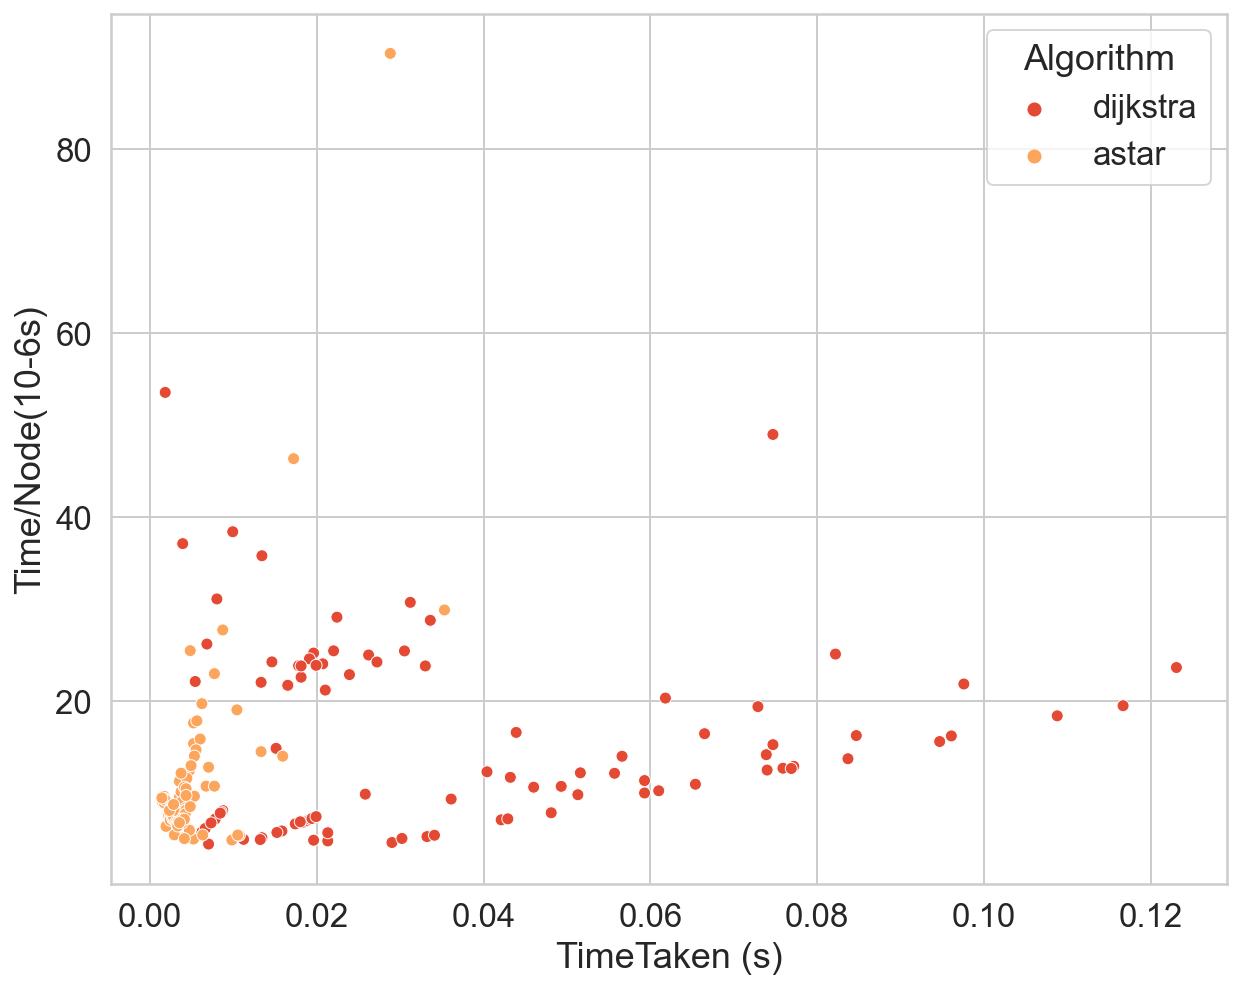

In [283]:
sns.scatterplot(x='TimeTaken (s)', y='Time/Node(10-6s)', data=df,hue='Algorithm')

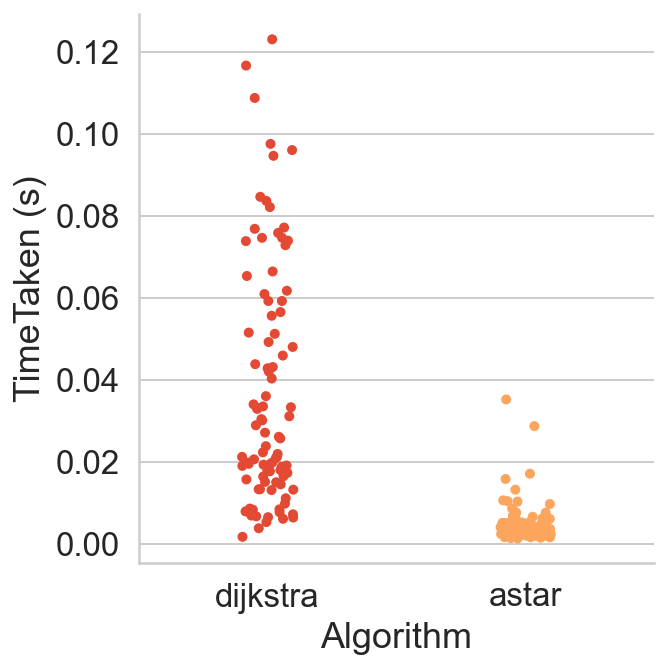

In [284]:
sns.catplot(x='Algorithm', y='TimeTaken (s)', data=df)

<AxesSubplot:xlabel='Algorithm', ylabel='TimeTaken (s)'>

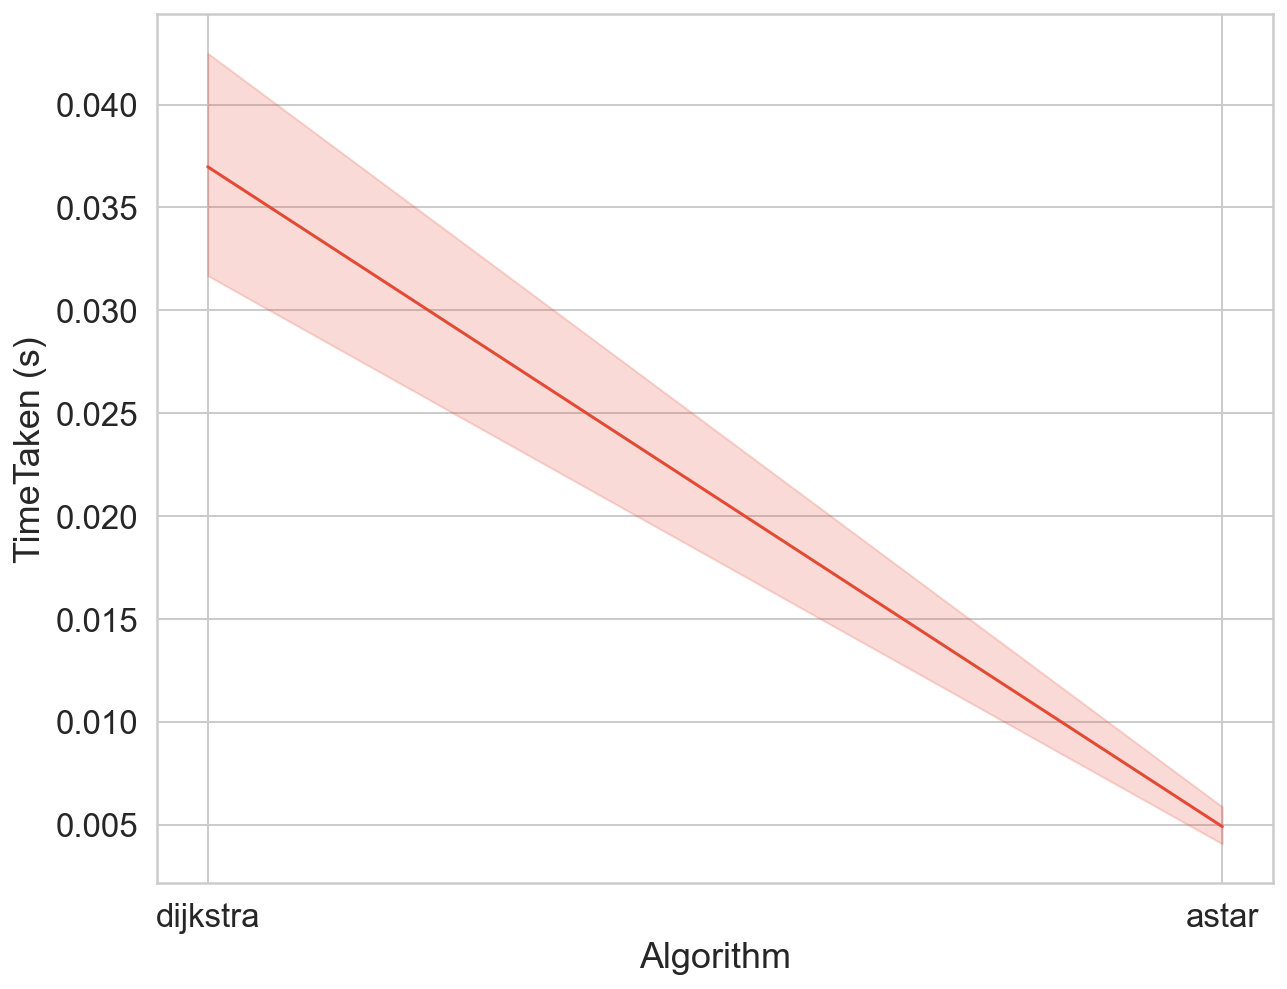

In [285]:
sns.lineplot(x='Algorithm', y='TimeTaken (s)', data=df)

<AxesSubplot:xlabel='Algorithm', ylabel='TimeTaken (s)'>

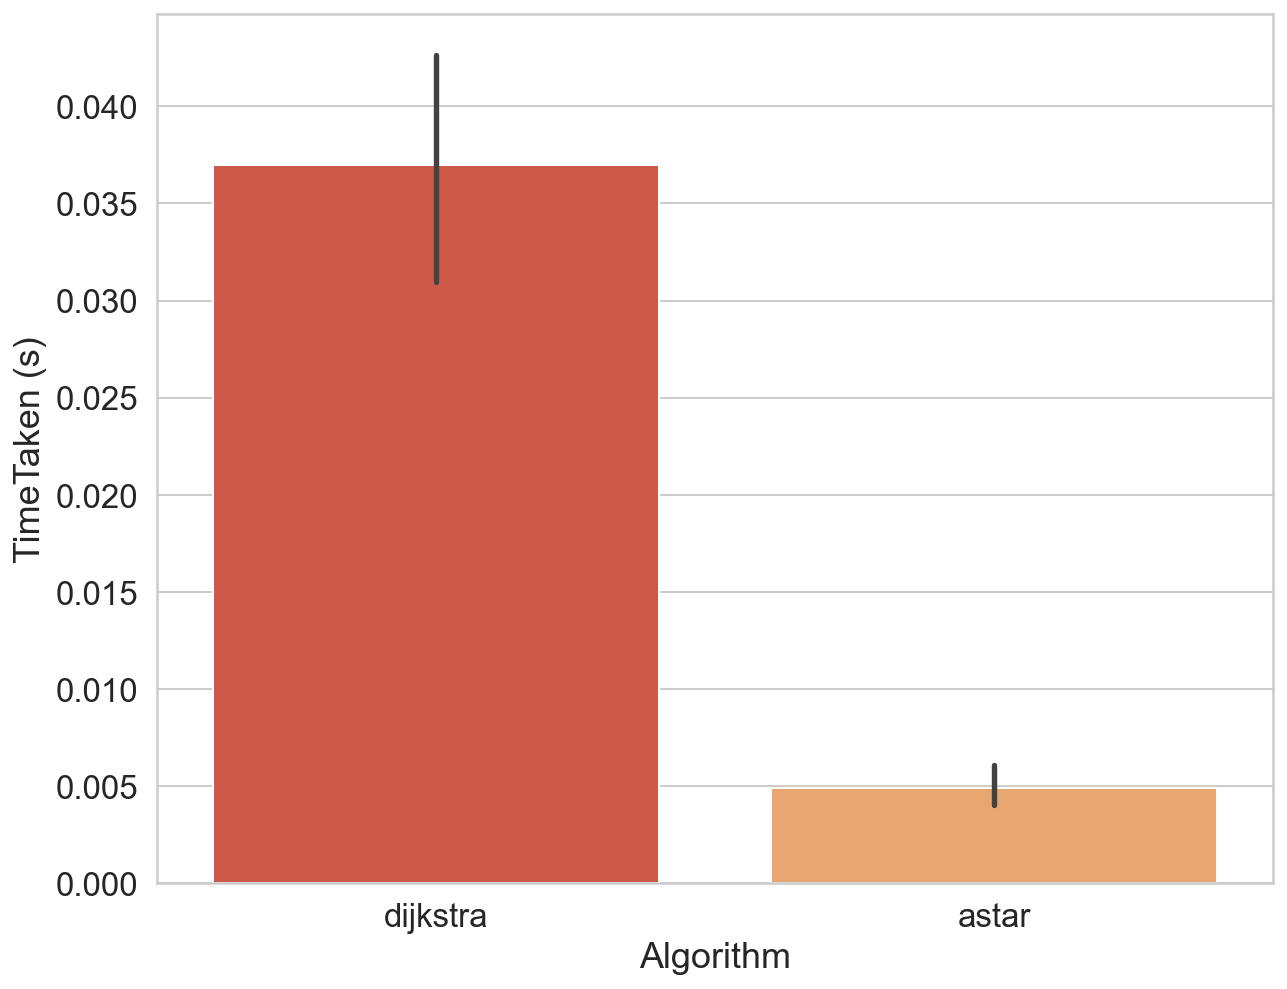

In [289]:
sns.barplot(x='Algorithm', y='TimeTaken (s)', data=df)

<AxesSubplot:xlabel='Algorithm', ylabel='TimeTaken (s)'>

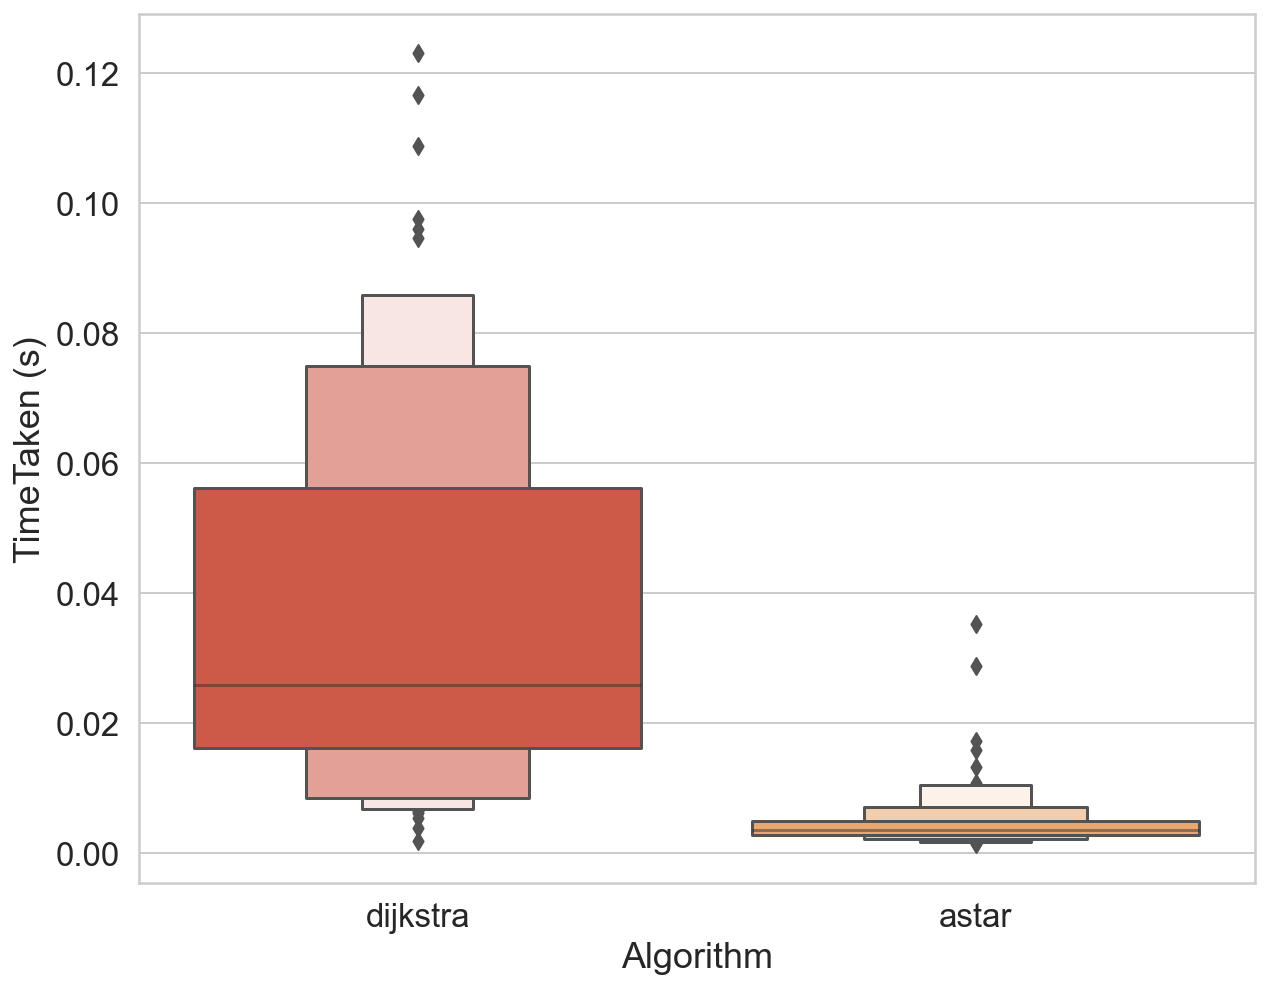

In [290]:
sns.boxenplot(x='Algorithm', y='TimeTaken (s)', data=df)

<AxesSubplot:xlabel='Algorithm', ylabel='TimeTaken (s)'>

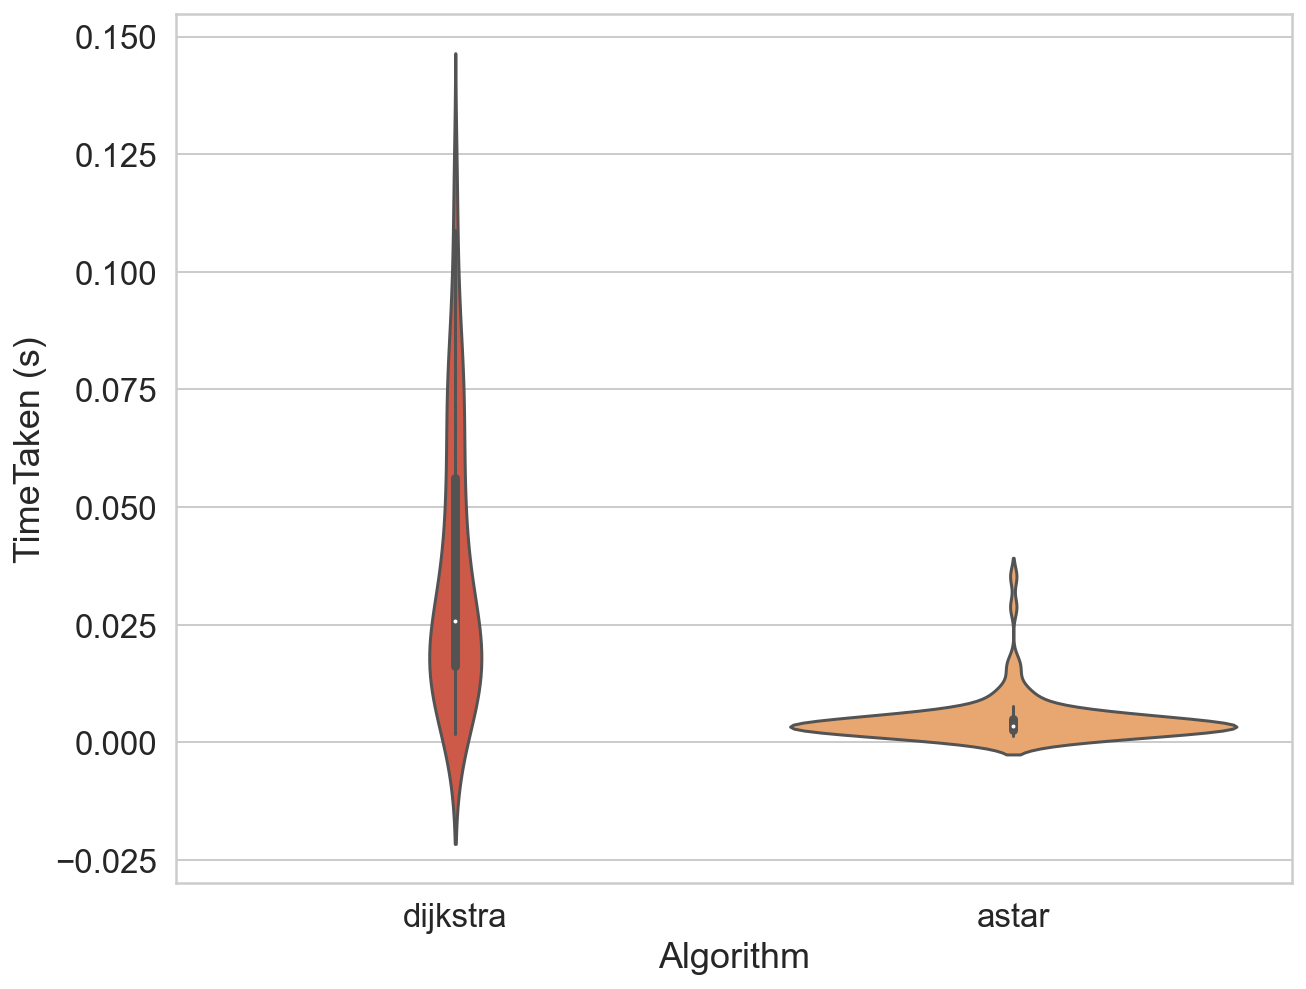

In [286]:
sns.violinplot(x=df['Algorithm'], y=df['TimeTaken (s)'], data=df)

In [287]:
avg_time_dijkstra = df[df['Algorithm'] == 'dijkstra']['TimeTaken (s)'].mean()
avg_time_astar = df[df['Algorithm'] == 'astar']['TimeTaken (s)'].mean()

print(f"a star is faster than dijsktra by {avg_time_dijkstra / avg_time_astar} times")

a star is faster than dijsktra by 7.544475641814407 times


## Generating Profile Report

In [288]:
ProfileReport(df)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]


## Conclusion

1. A star is the more effective than dijkstra performing 6 times faster than the other.